# Investment Case Study 1

* The objective is to identify the best sectors, countries, and a suitable investment type for making investments for Spark Funds, an asset management company.


### Checkpoint 1:
To create 2 dataframes:
**companies_df** with basic data of companies.
**rounds2_df** with Funding round details.
To merge the 2 data frames into into a single data frame **master_frame**.

In [1]:
import pandas as pd

#Load dataframes companies and rounds2 with companies and funding round details respectively

companies_df = pd.read_table('./companies.txt', encoding = 'palmos')
rounds2_df =pd.read_csv('./rounds2.csv', encoding = 'palmos')
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2]:
#Get count of uniques companies present in funding rounds detail data

unique_companies_in_rounds2 = pd.unique(rounds2_df.loc[:,'company_permalink'].str.upper())
print ("Number of unique companies present in rounds2 data:", unique_companies_in_rounds2.size)

#66368

Number of unique companies present in rounds2 data: 66368


In [3]:
#Get count of uniques companies present in companies detail data

unique_companies_in_companies = pd.unique(companies_df.loc[:,'permalink'].str.upper())
print ("Number of unique companies present in companies data:", unique_companies_in_companies.size)

#66368

Number of unique companies present in companies data: 66368


In [4]:
# Get companies in the rounds2 file which are not present in companies

rounds2_df.loc[~rounds2_df['company_permalink'].str.upper().isin(companies_df['permalink'].str.upper())]

#No extra/different company in rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [5]:
#Merge the two data frames

companies_df['permalink'] = companies_df['permalink'].apply(lambda x: x.upper())
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].apply(lambda x: x.upper())
master_frame = rounds2_df.merge(companies_df, how='inner',  left_on=["company_permalink"], right_on=["permalink"])
master_frame.drop(['permalink'], axis = 1, inplace = True)

In [6]:
#Get number of observations present in master_frame

len(master_frame.index)

114949

### Checkpoint 2
Clean the raised_amount_usd data and calculate mean value of investment for the four funding types (venture, angel, seed, and private equity) to identify best investment type for Spark Funds


In [7]:
#Check missing data percentage to check amount of missing data in raised_amount_usd column

100*(master_frame.isnull().sum()/len(master_frame.index))

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

In [8]:
# Clean missing data in raised_amount_usd:
# For calculating mean of raised_amount_usd for different funding types we we need to handle the rows with missing data.
# As the missing data for raised_amount_usd is 17.39%, we can safely delete the data as we still have around 82% for 
# our data analysis task

master_frame = master_frame.loc[~pd.isnull(master_frame['raised_amount_usd']),:]

In [9]:
#Check missing data percentage after dropping rows with raised_amount_usd missing and the number of observations remaining

print(100*(master_frame.isnull().sum()/len(master_frame.index)))
len(master_frame.index)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         70.335619
funded_at                   0.000000
raised_amount_usd           0.000000
name                        0.001053
homepage_url                4.561969
category_list               1.099422
status                      0.000000
country_code                6.161607
state_code                  8.007666
region                      7.422151
city                        7.418991
founded_at                 16.813572
dtype: float64


94959

In [10]:
#Calculate mean raised_amount_usd for funding_round_type in ['venture', 'angel', 'seed', 'private_equity']

master_frame_by_type = master_frame.groupby('funding_round_type')
mean_amount_by_type = master_frame_by_type['raised_amount_usd'].mean()
pd.options.display.float_format = "{:.2f}".format
investment_type_with_fund = pd.DataFrame(mean_amount_by_type[['venture', 'angel', 'seed', 'private_equity']])
display(investment_type_with_fund)

,raised_amount_usd
funding_round_type,
venture,11748949.13
angel,958694.47
seed,719818.00
private_equity,73308593.03


In [11]:
# Get investment type with amount between 5 million and 15 million USD

investment_type_with_fund.loc[(investment_type_with_fund.raised_amount_usd >= 5000000) & 
                              (investment_type_with_fund.raised_amount_usd <= 15000000)]

#venture

,raised_amount_usd
funding_round_type,
venture,11748949.13


In [12]:
# Filter the data so it only contains the chosen investment type - venture
import copy

master_frame_venturetype = copy.deepcopy(master_frame.loc[(master_frame.funding_round_type == 'venture'),:])
master_frame_venturetype.head()

# Creating a copy of master frame and not modifying in place as it is used in plot 1 later on 
# where data of all funding types in needed

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


### Checkpoint 3
Get the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type) and create a dataframe **top9** containing investment information of the top 9 countries with highest total investment


In [13]:
#Check the total amount invested in different countries for the chosen investment type - venture

amount_by_country = master_frame_venturetype.groupby(['country_code'])
total_investment_country_wise = amount_by_country['raised_amount_usd'].sum()
total_investment_country_wise.sort_values(ascending = False, inplace = True)
total_investment_country_wise[0:9]

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
IND    14391858718.00
CAN     9583332317.00
FRA     7259536732.00
ISR     6907514579.00
DEU     6346959822.00
JPN     3363676611.00
Name: raised_amount_usd, dtype: float64

In [14]:
#Create top9 dataframe

top9 = master_frame_venturetype.loc[master_frame_venturetype.country_code.isin(total_investment_country_wise[0:9].index)]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [15]:
#converting the top 9 country codes to conutry name to match with the english speaking countries list 
#in the Countries_where_English_is_an_official_language.pdf 
import pycountry

for country_code in total_investment_country_wise[0:9].index:
    country = pycountry.countries.get(alpha_3=country_code)
    print(country.name)

United States
China
United Kingdom
India
Canada
France
Israel
Germany
Japan


### Checkpoint 4
Create a merged data frame with each primary sector mapped to its main sector

In [16]:
#Create a primary category column containing the primary column extracted from category list column

master_frame_venturetype.loc[:, 'primary_category'] = master_frame_venturetype['category_list'].apply(lambda x: str(x).split('|',1)[0])
master_frame_venturetype.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [17]:
# Read the category mapping data into a dataframe

mapping_frame = pd.read_csv('./mapping.csv', encoding = 'ISO-8859-1')
mapping_frame.head()

#fixing the data - replacing 0 with na to fix category names - for categories having 'na' in their name the string 'na' is 
#replaced with 0 in the file. So we need to replace 0 with na to fix the category names.

mapping_frame['category_list'] = mapping_frame['category_list'].str.replace('0', 'na')

In [18]:
# Convert the wide data format of the mapping dataframe to long data format to get 
# primary_category to main_category mapping

mapping_frame_longdf = pd.melt(mapping_frame, id_vars=['category_list'], 
                               value_vars=['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 
                                           'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging',
                                           'Others', 'Social, Finance, Analytics, Advertising'])

#rename columns

mapping_frame_longdf = mapping_frame_longdf.rename(columns = {'category_list': 'primary_category',
                                                              'variable': 'main_category', 'value':'is_main_category'})

# filtering rows to get only required mapping rows

mapping_frame_longdf = mapping_frame_longdf.loc[(mapping_frame_longdf.is_main_category == 1),
                                                ['primary_category', 'main_category']]

mapping_frame_longdf.head()

,primary_category,main_category
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [19]:
# Create a merged dataframe by merging the mapping data into master_frame to get dataframe with main category 
# mapped to the investment and company data

merged_frame = copy.deepcopy(master_frame_venturetype.merge(mapping_frame_longdf, how='inner',  on='primary_category'))

### Checkpoint 5
Create 3 dataframes 1 each for the top 3 english speaking countries with highest total funding across all sectors.
Each dataframe to contain all co

In [20]:
#Create dataframe D1 for USA 

D1 = copy.deepcopy(merged_frame.loc[(merged_frame.country_code == 'USA') & (merged_frame.raised_amount_usd >= 5000000) & 
                                            (merged_frame.raised_amount_usd <= 15000000), :])

D1_group_by_main_sector = D1.groupby(['main_category'])

#creating column with total number (or count) of investments for each main sector
D1_no_of_investments_by_main_sector = D1_group_by_main_sector['raised_amount_usd'].count()
D1.loc[:,'no_of_investments_for_main_category'] = D1['main_category'].apply(
                                            lambda x:D1_no_of_investments_by_main_sector[str(x)])

#creating column with total amount invested in each main sector
D1_total_investment_by_main_sector = D1_group_by_main_sector['raised_amount_usd'].sum()
D1.loc[:,'total_investment_for_main_category'] = D1['main_category'].apply(
                                            lambda x:D1_total_investment_by_main_sector[str(x)])
display(D1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_category,no_of_investments_for_main_category,total_investment_for_main_category
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,591,5099197982.00
16,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,591,5099197982.00
24,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5099197982.00
25,/ORGANIZATION/HUFFINGTONPOST,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,591,5099197982.00
33,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,591,5099197982.00
35,/ORGANIZATION/MEDIABONG,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.00,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,591,5099197982.00
38,/ORGANIZATION/NEWSCORPORATION,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.00,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,591,5099197982.00
39,/ORGANIZATION/NOKEENA,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.00,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,591,5099197982.00
41,/ORGANIZATION/NOKEENA,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.00,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,591,5099197982.00
45,/ORGANIZATION/PLUMTV,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.00,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,Media,Entertainment,591,5099197982.00


In [21]:
#Create dataframe D2 for GBR 

D2 = copy.deepcopy(merged_frame.loc[(merged_frame.country_code == 'GBR') & (merged_frame.raised_amount_usd >= 5000000) & 
                                            (merged_frame.raised_amount_usd <= 15000000), :])

D2_group_by_main_sector = D2.groupby(['main_category'])

#creating column with total number (or count) of investments for each main sector
D2_no_of_investments_by_main_sector = D2_group_by_main_sector['raised_amount_usd'].count()
D2.loc[:,'no_of_investments_for_main_category'] = D2['main_category'].apply(
                                            lambda x:D2_no_of_investments_by_main_sector[str(x)])

#creating column with total amount invested in each main sector
D2_total_investment_by_main_sector = D2_group_by_main_sector['raised_amount_usd'].sum()
D2.loc[:,'total_investment_for_main_category'] = D2['main_category'].apply(
                                            lambda x:D2_total_investment_by_main_sector[str(x)])
display(D2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_category,no_of_investments_for_main_category,total_investment_for_main_category
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,482784687.00
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,56,482784687.00
220,/ORGANIZATION/FLYPAY,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,A,16-07-2015,10700000.00,Flypay,http://www.flypay.co.uk,Apps|Customer Service|Restaurants,operating,GBR,H9,London,London,26-02-2013,Apps,"News, Search and Messaging",73,615746235.00
292,/ORGANIZATION/KAAZING,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.00,Kaazing,http://www.kaazing.com,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,H9,London,London,01-05-2007,Apps,"News, Search and Messaging",73,615746235.00
337,/ORGANIZATION/MINDSHAPES,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,A,01-11-2011,5000000.00,Mindshapes,http://mindshapes.com,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,H9,London,London,01-01-2010,Apps,"News, Search and Messaging",73,615746235.00
359,/ORGANIZATION/MUSIXMATCH,/funding-round/c3651c4b14e674e52cc80b30939470ac,venture,NaN,02-09-2014,5000000.00,Musixmatch,http://www.musixmatch.com,Apps|Entertainment|Music,operating,GBR,H9,London,London,21-01-2010,Apps,"News, Search and Messaging",73,615746235.00
384,/ORGANIZATION/OSPER,/funding-round/ac08d1ecd4c3d13cb5ca98a215027e7b,venture,NaN,29-06-2014,10000000.00,Osper,http://osper.com,Apps|Banking|Financial Services|FinTech,operating,GBR,H9,London,London,01-01-2012,Apps,"News, Search and Messaging",73,615746235.00
532,/ORGANIZATION/TRAFI,/funding-round/4895544aef21ece47670b896ec0af35e,venture,A,19-05-2015,6500000.00,TRAFI,http://www.trafi.com,Apps|Information Technology|Mobile|Public Tran...,operating,GBR,H9,London,London,01-09-2013,Apps,"News, Search and Messaging",73,615746235.00
669,/ORGANIZATION/AZIMO,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,11-03-2014,10000000.00,Azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,29-10-2012,Curated Web,"News, Search and Messaging",73,615746235.00
680,/ORGANIZATION/BASEKIT-PLATFORM,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,NaN,13-05-2014,7000000.00,BaseKit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",73,615746235.00


In [22]:
#Create dataframe D3 for IND

D3 = copy.deepcopy(merged_frame.loc[(merged_frame.country_code == 'IND') & (merged_frame.raised_amount_usd >= 5000000) & 
                                            (merged_frame.raised_amount_usd <= 15000000), :])

D3_group_by_main_sector = D3.groupby(['main_category'])

#creating column with total number (or count) of investments for each main sector
D3_no_of_investments_by_main_sector = D3_group_by_main_sector['raised_amount_usd'].count()
D3.loc[:,'no_of_investments_for_main_category'] = D3['main_category'].apply(
                                            lambda x:D3_no_of_investments_by_main_sector[str(x)])

#creating column with total amount invested in each main sector
D3_total_investment_by_main_sector = D3_group_by_main_sector['raised_amount_usd'].sum()
D3.loc[:,'total_investment_for_main_category'] = D3['main_category'].apply(
                                            lambda x:D3_total_investment_by_main_sector[str(x)])
display(D3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_category,no_of_investments_for_main_category,total_investment_for_main_category
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,33,280830000.00
155,/ORGANIZATION/CHILLR-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.00,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,Apps,"News, Search and Messaging",52,433834545.00
288,/ORGANIZATION/JUGNOO,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.00,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging",52,433834545.00
389,/ORGANIZATION/PEPPERTAP,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.00,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging",52,433834545.00
527,/ORGANIZATION/TINYOWL-TECHNOLOGY,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.00,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NaN,Apps,"News, Search and Messaging",52,433834545.00
550,/ORGANIZATION/URBANCLAP,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.00,UrbanClap,https://www.urbanclap.com,Apps,operating,IND,7,Delhi,Delhi,01-10-2014,Apps,"News, Search and Messaging",52,433834545.00
671,/ORGANIZATION/BABAJOB,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.00,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging",52,433834545.00
695,/ORGANIZATION/BHARAT-MATRIMONY,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.00,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging",52,433834545.00
727,/ORGANIZATION/BLUESTONE-COM,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.00,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",52,433834545.00
729,/ORGANIZATION/BLUESTONE-COM,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.00,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",52,433834545.00


In [23]:
 #1. Total number of investments (count)
#USA
D1_no_of_investments_by_main_sector.sum()
#12012

#GBR
D2_no_of_investments_by_main_sector.sum()
#619

#IND
D3_no_of_investments_by_main_sector.sum()
#328

 

328

In [24]:
#2. Total amount of investment (USD)
#USA
D1_total_investment_by_main_sector.sum()
#107318294664.0

#GBR
D2_total_investment_by_main_sector.sum()
#5365228300.0

#IND
D3_total_investment_by_main_sector.sum()
#2949543602.0

2949543602.0

In [25]:
 #3. Top sector (based on count of investments)

D1_sectorwise_no_of_investments_frame = pd.DataFrame(D1_no_of_investments_by_main_sector).sort_values(by='raised_amount_usd',ascending=False)
D2_sectorwise_no_of_investments_frame = pd.DataFrame(D2_no_of_investments_by_main_sector).sort_values(by='raised_amount_usd',ascending=False)
D3_sectorwise_no_of_investments_frame = pd.DataFrame(D3_no_of_investments_by_main_sector).sort_values(by='raised_amount_usd',ascending=False)

#USA
D1_sectorwise_no_of_investments_frame.iloc[0]
#Investment count    2950
#Name: Others

#GBR
D2_sectorwise_no_of_investments_frame.iloc[0]
#Investment count    147
#Name: Others

#IND
D3_sectorwise_no_of_investments_frame.iloc[0]
#Investment count    110
#Name: Others

raised_amount_usd    110
Name: Others, dtype: int64

In [26]:
#4. Second-best sector (based on count of investments)
#USA
D1_sectorwise_no_of_investments_frame.iloc[1]
#Investment count    2714
#Name: Social, Finance, Analytics, Advertising

#GBR
D2_sectorwise_no_of_investments_frame.iloc[1]
#Investment count    133
#Name: Social, Finance, Analytics, Advertising

#IND
D3_sectorwise_no_of_investments_frame.iloc[1]
#Investment count    60
#Name: Social, Finance, Analytics, Advertising

raised_amount_usd    60
Name: Social, Finance, Analytics, Advertising, dtype: int64

In [27]:
#5. Third-best sector (based on count of investments)

#USA
D1_sectorwise_no_of_investments_frame.iloc[2]
#Investment count    2300
#Name: Cleantech / Semiconductors

#GBR
D2_sectorwise_no_of_investments_frame.iloc[2]
#Investment count    128
#Name: Cleantech / Semiconductors

#IND
D3_sectorwise_no_of_investments_frame.iloc[2]
#Investment count    52
#Name: News, Search and Messaging


raised_amount_usd    52
Name: News, Search and Messaging, dtype: int64

In [28]:
#6. Number of investments in the top sector (refer to point 3) - same commands return the count
#USA
#Investment count    2950

#GBR
#Investment count    147

#IND
#Investment count    110

In [29]:
#7. Number of investments in the second-best sector (refer to point 4) - same commands return the count
#USD
#Investment count    2714

#GBR
#Investment count    133

#IND
#Investment count    60

In [30]:
#8. Number of investments in the third-best sector (refer to point 5) - same commands return the count
#USD
#Investment count    2300

#GBR
#Investment count    128

#IND
#Investment count    52

In [31]:
#9. For the top sector count-wise (point 3), which company received the highest investment?
#USD
D1_top_sector = D1.loc[(D1.main_category == 'Others')]
D1_top_sector_amount_by_company = D1_top_sector.groupby(['name', 'company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D1_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#Virtustream, /ORGANIZATION/VIRTUSTREAM
#64300000.00

#GBR
D2_top_sector = D2.loc[(D2.main_category == 'Others')]
D2_top_sector_amount_by_company = D2_top_sector.groupby(['name','company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D2_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#Electric Cloud, /ORGANIZATION/ELECTRIC-CLOUD
#37000000.00

#IND
D3_top_sector = D3.loc[(D3.main_category == 'Others')]
D3_top_sector_amount_by_company = D3_top_sector.groupby(['name', 'company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D3_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#FirstCry.com, /ORGANIZATION/FIRSTCRY-COM
#39000000.00

raised_amount_usd   39000000.00
Name: (FirstCry.com, /ORGANIZATION/FIRSTCRY-COM), dtype: float64

In [32]:
#10. For the second-best sector count-wise (point 4), which company received the highest investment?
#USD
D1_top_sector = D1.loc[(D1.main_category == 'Social, Finance, Analytics, Advertising')]
D1_top_sector_amount_by_company = D1_top_sector.groupby(['name', 'company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D1_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#SST Inc. (Formerly ShotSpotter), /ORGANIZATION/SHOTSPOTTER
#67933006.00

#GBR
D2_top_sector = D2.loc[(D2.main_category == 'Social, Finance, Analytics, Advertising')]
D2_top_sector_amount_by_company = D2_top_sector.groupby(['name', 'company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D2_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#Celltick Technologies, /ORGANIZATION/CELLTICK-TECHNOLOGIES
#37500000.00

#IND
D3_top_sector = D3.loc[(D3.main_category == 'Social, Finance, Analytics, Advertising')]
D3_top_sector_amount_by_company = D3_top_sector.groupby(['name', 'company_permalink'])['raised_amount_usd'].sum()
pd.DataFrame(D3_top_sector_amount_by_company).sort_values(by='raised_amount_usd',ascending=False).iloc[0]
#Manthan Systems, /ORGANIZATION/MANTHAN-SYSTEMS
#50700000.00

raised_amount_usd   50700000.00
Name: (Manthan Systems, /ORGANIZATION/MANTHAN-SYSTEMS), dtype: float64

### Checkpoint 6
Plots

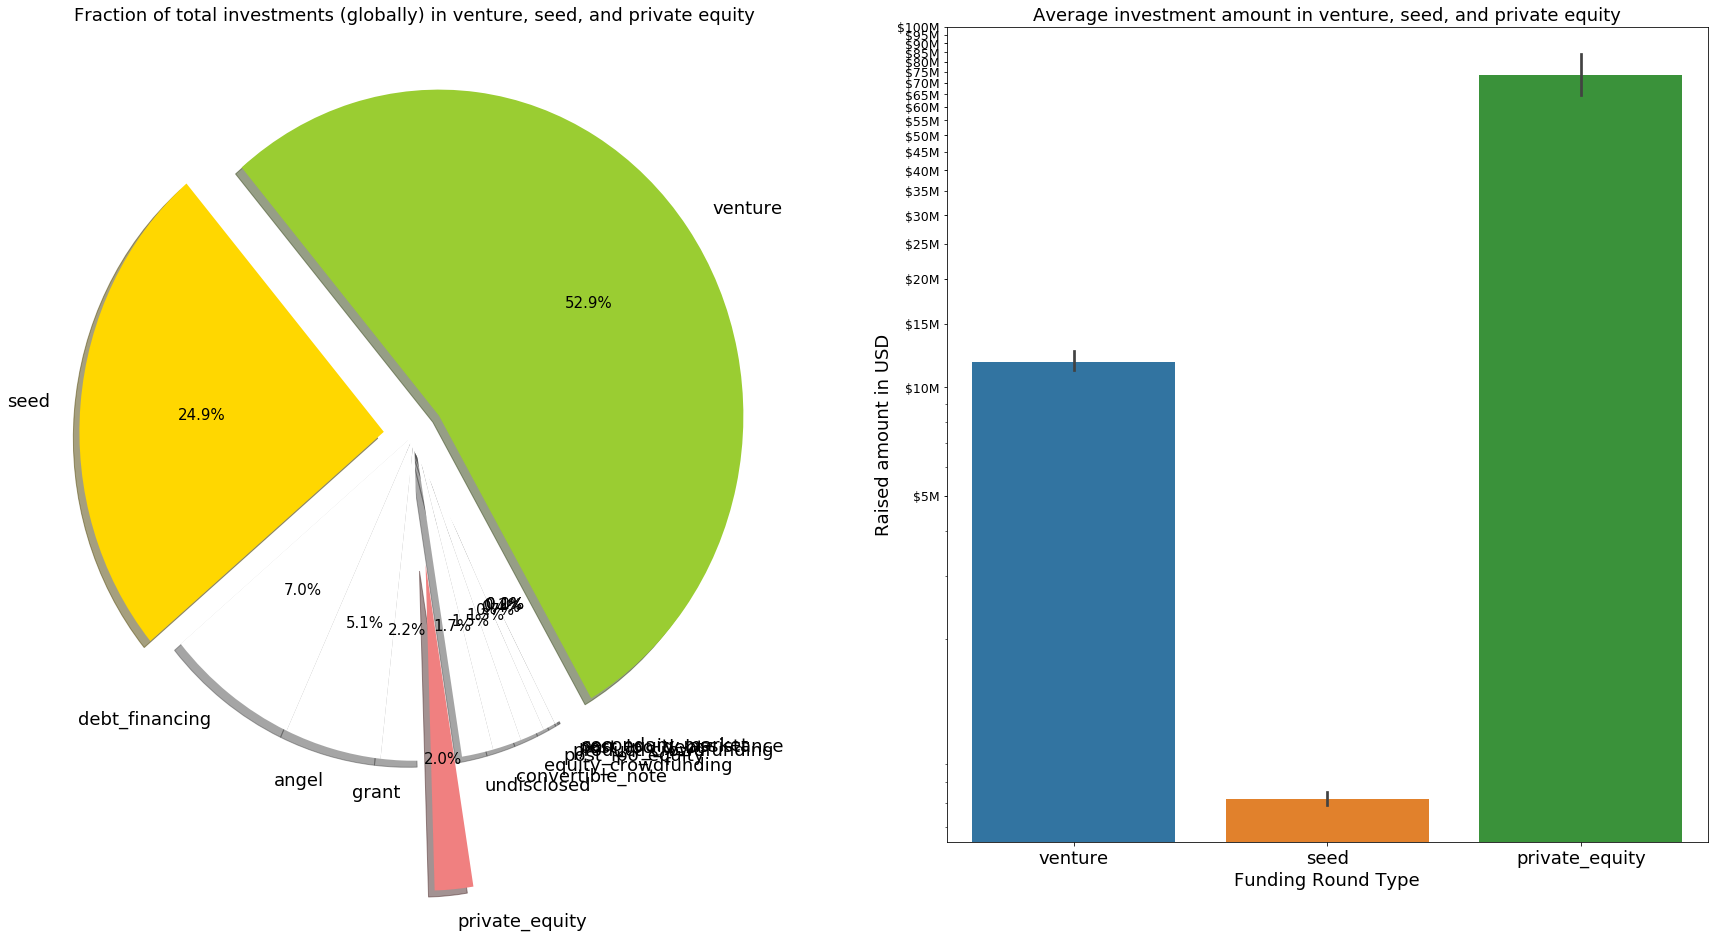

In [33]:
# 1. plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
# 2. and the average amount of investment in each funding type

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.ticker as tick
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import numpy as np

params = {'font.size': 15.0,
          'legend.fontsize': 'large',
          'figure.figsize': (30, 15),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'small'}
pylab.rcParams.update(params)

plt.figure(1)

#1. fraction of total investments (globally) in venture, seed, and private equity

#create a series with count of investments for each investment type to be used for plotting

funding_rnd_type_count = master_frame_by_type['raised_amount_usd'].count()
funding_rnd_type_count.sort_values(ascending=False, inplace=True)

plt.subplot(1,2,1)

#use pie plot to show fraction of investments for venture, seed, and private equity
plt.title("Fraction of total investments (globally) in venture, seed, and private equity")
explode = (0.1, 0.1, 0, 0, 0, 0.4, 0.0, 0, 0, 0, 0 ,0, 0, 0)
colors = ['yellowgreen', 'gold', 'white', 'white', 'white', 'lightcoral', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white']
plt.pie(list(funding_rnd_type_count), explode=explode, labels=funding_rnd_type_count.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=300)

#2. average amount of investment in venture, seed, and private equity

plt.subplot(1,2,2)

#create data frame to be used for plotting
funding_rnd_type = ['venture', 'seed', 'private_equity']
data_frame = master_frame.loc[(master_frame.funding_round_type.isin(funding_rnd_type))]

#use bar plot to show average amount of investment in venture, seed, and private equity
ax = sns.barplot(x = "funding_round_type", y = "raised_amount_usd", data = data_frame,log=True)
ax.set(xlabel = "Funding Round Type", ylabel = "Raised amount in USD", 
            title = "Average investment amount in venture, seed, and private equity")

#set y-axis limit
plt.ylim(ymax = 100000000)

# display y axis values in Millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000000))

#display the plot
plt.show()

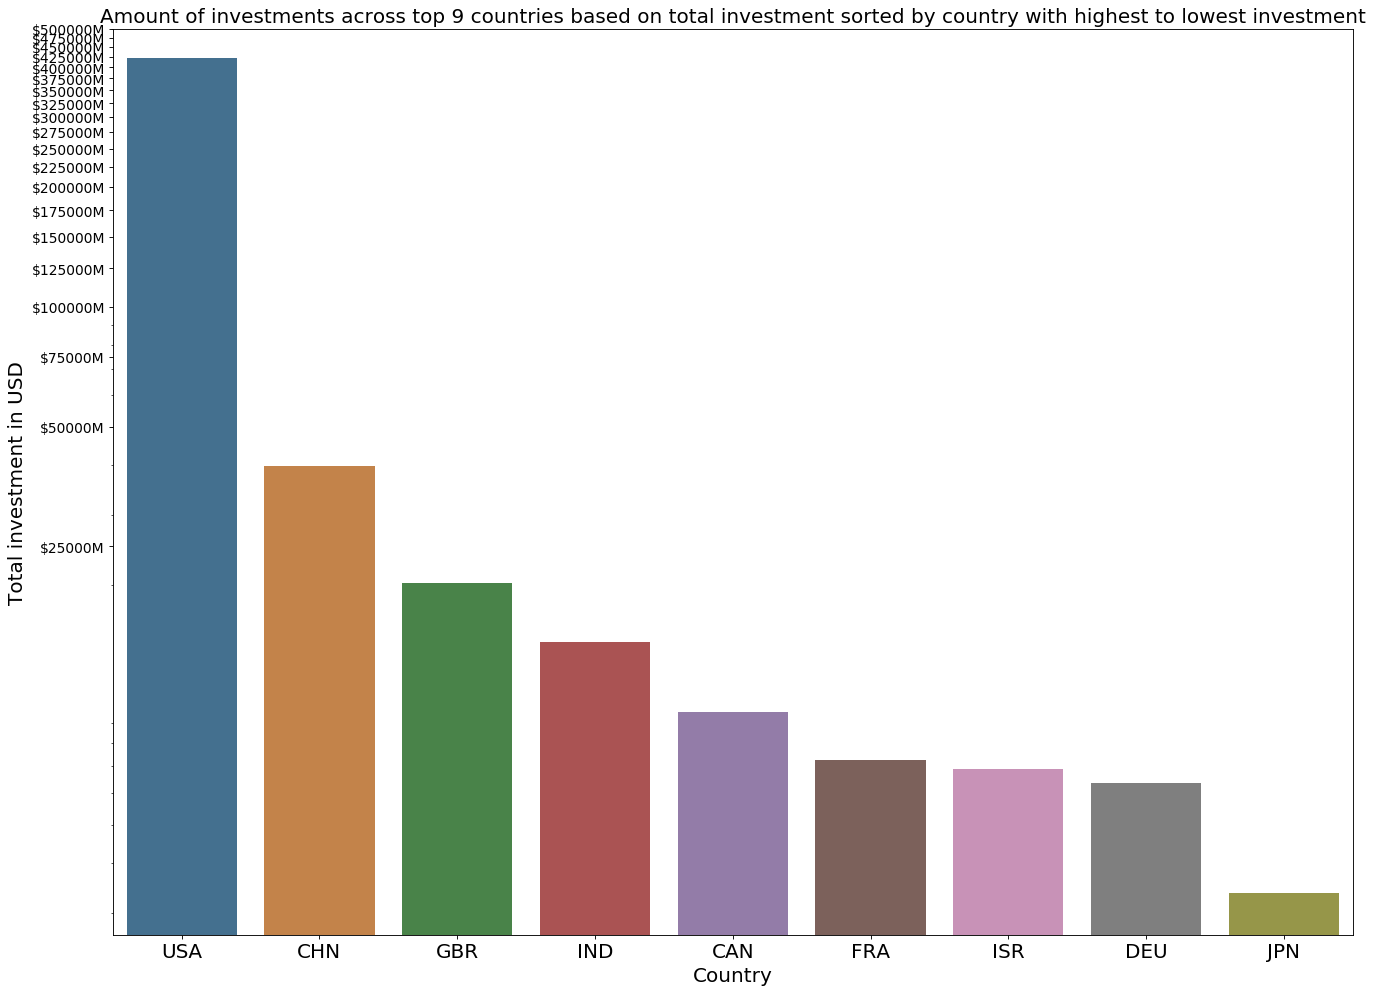

In [34]:
# plot showing the top 9 countries against the total amount of investments of funding type FT

plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
barWidth = 2

#create frame to be used for plotting
data_frame = pd.DataFrame(total_investment_country_wise[0:9])

#use bar plot for plotting total amount of investments in different countries
ax = sns.barplot(x = data_frame.index, y = "raised_amount_usd", data = data_frame, saturation=.5, estimator = sum, log = True)
plt.title("Amount of investments across top 9 countries based on total investment sorted by country with highest to lowest investment")
plt.ylabel("Total investment in USD")
plt.xlabel('Country')

#set y-axis limit
plt.ylim(ymax = 500000000000)

# display y axis values in Millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000000000))

#display the plot
plt.show() 

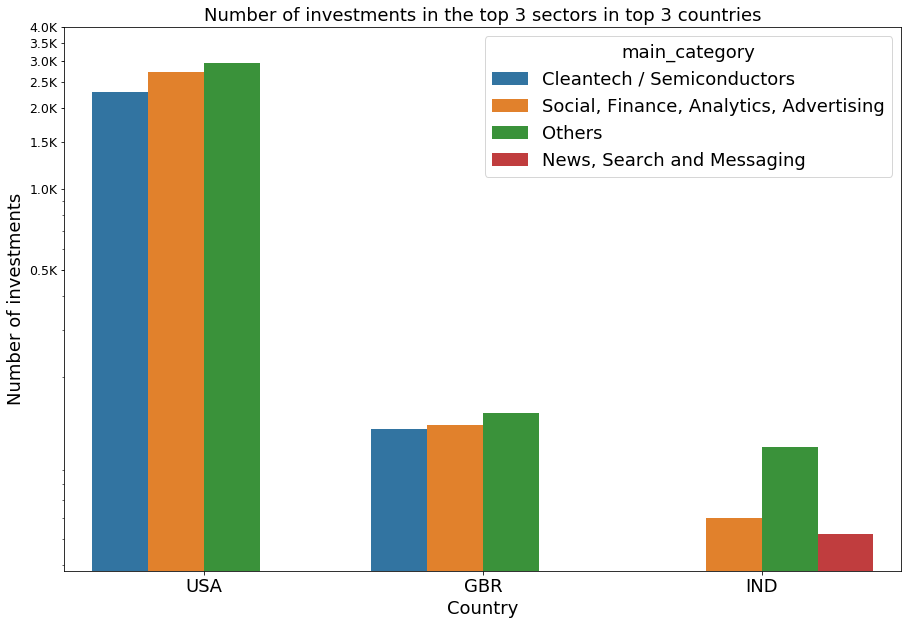

In [35]:
# plot showing the number of investments in the top 3 sectors of the top 3 countries

plt.figure(figsize=(15,10))

merged_frame = merged_frame.loc[(merged_frame.raised_amount_usd >= 5000000) & 
                                            (merged_frame.raised_amount_usd <= 15000000), :]

#create a concatenated dataframe containing the records in the top 3 sectors in top 3 countries to be used for plotting
data_frame_usa = merged_frame.loc[(merged_frame.country_code == 'USA') & 
                                  (merged_frame.main_category.isin(D1_sectorwise_no_of_investments_frame[0:3].index))]
data_frame_gbr = merged_frame.loc[(merged_frame.country_code == 'GBR') & 
                                  (merged_frame.main_category.isin(D2_sectorwise_no_of_investments_frame[0:3].index))]
data_frame_ind = merged_frame.loc[(merged_frame.country_code == 'IND') & 
                                  (merged_frame.main_category.isin(D3_sectorwise_no_of_investments_frame[0:3].index))]

top3sector_inTop3country_frame = pd.concat([data_frame_usa, data_frame_gbr, data_frame_ind])

#use count plot to plot the count of investments accross 2 catgories - Countries and sectors  
ax = sns.countplot(x = 'country_code', hue = 'main_category', data = top3sector_inTop3country_frame, log = True)
plt.title("Number of investments in the top 3 sectors in top 3 countries")
plt.ylabel("Number of investments")
plt.xlabel('Country')

#set y-axis limit
plt.ylim(ymax = 4000)

# display y axis values in Thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)
formatter = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

#display the plot
plt.show()